In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import datetime

In [ ]:

from google.colab import files 
  
  
uploaded = files.upload()



In [ ]:
df=pd.read_csv('Combined_data2.csv',parse_dates=['Time_Period'])

In [ ]:
df['Time_Period']=df['Time_Period'].apply(lambda x: datetime.datetime.strptime(x,'%b-%y')) 

In [ ]:
df=df.set_index('Time_Period')

In [ ]:
df.head(5)

,Export,Import,Mining_Index,Electricity_Index,CokeFuel_Index,WPI_OILS,Silver_Price,Gold_Price,Oil_Price
Time_Period,,,,,,,,,
2005-04-01,2990,13511,100.9,103.0,87.6,107.2,1245.75,18775.03,2316.53
2005-05-01,2697,14178,103.3,108.2,95.4,107.4,1221.24,18347.73,2166.31
2005-06-01,3660,13495,98.1,104.1,97.7,108.8,1274.45,18770.71,2457.81
2005-07-01,3287,15215,95.5,101.7,101.3,114.1,1220.79,18480.74,2554.34
2005-08-01,4125,17275,91.4,106.6,100.6,113.9,1226.76,19105.09,2833.94


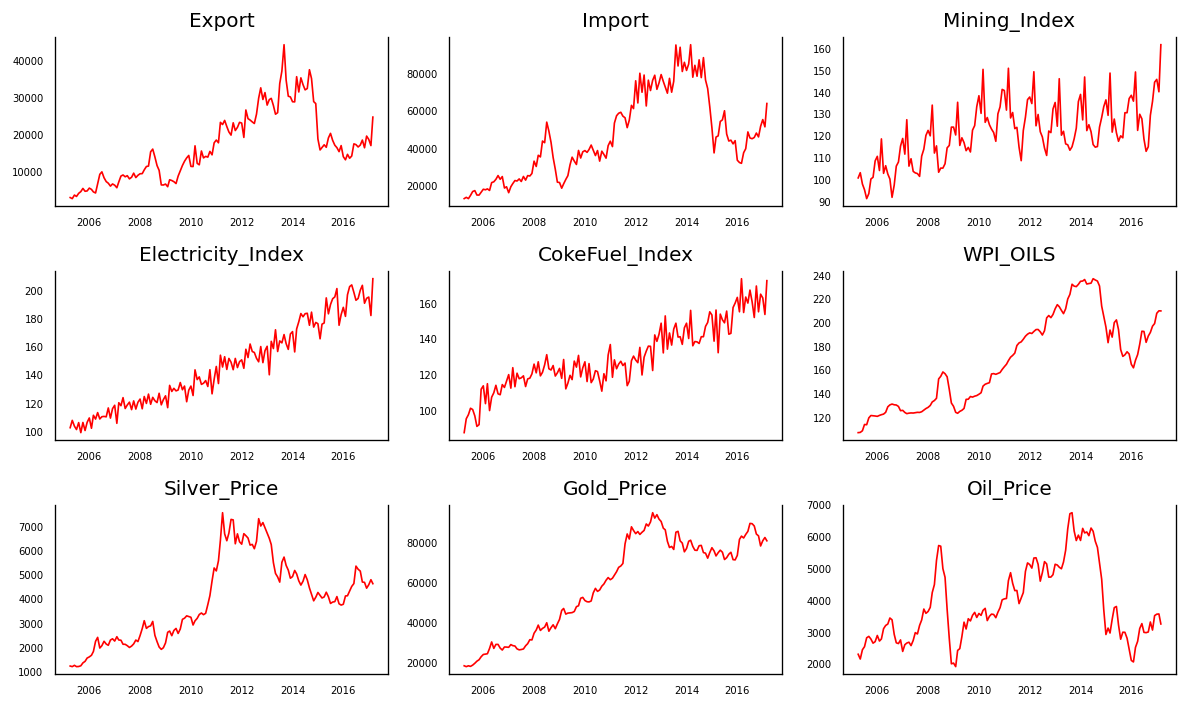

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Plot
fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)
    plt.tight_layout();

In [ ]:
from scipy import stats

# unpacks the test statistic and p-value from the normaltest of gold
stat, p = stats.normaltest(df.Oil_Price)

# prints both the test statistic and p-value
print('Statistics=%.3f, p=%.3f' % (stat, p))

# chooses an alpha of 0.05 and assigns to variable 'alpha'
alpha = 0.05

# creates an if statement for the hypothesis using the p-value test
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')


Statistics=13.502, p=0.001
Data does not look Gaussian (reject H0)


In [ ]:
print('Kurtosis of normal distribution: {}'.format(stats.kurtosis(df.Oil_Price)))
print('Skewness of normal distribution: {}'.format(stats.skew(df.Oil_Price)))

Kurtosis of normal distribution: -0.688251770546211
Skewness of normal distribution: 0.5891977359239297


count     144.000000
mean     3878.491458
std      1198.269384
min      1927.050000
25%      2941.865000
50%      3571.660000
75%      4880.682500
max      6766.970000
Name: Oil_Price, dtype: float64

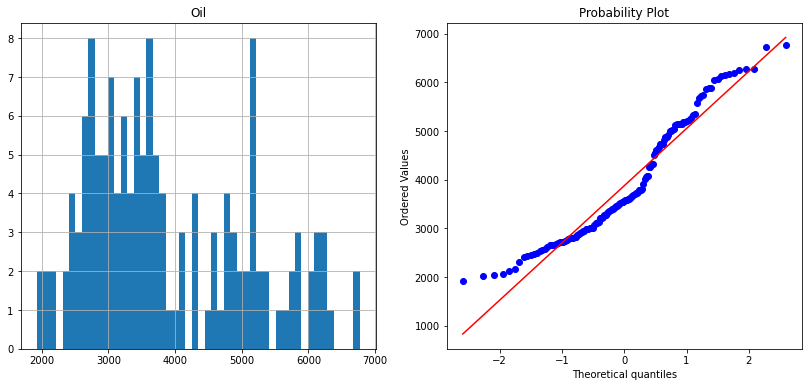

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['Oil_Price'].hist(bins=50)
plt.title('Oil')
plt.subplot(1,2,2)
stats.probplot(df['Oil_Price'], plot=plt);
df.Oil_Price.describe().T

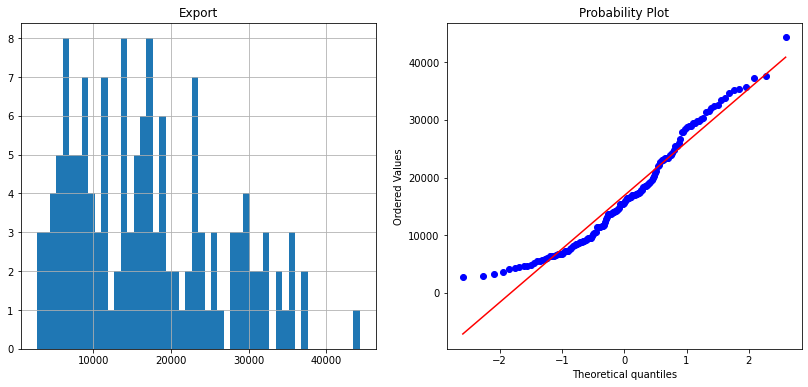

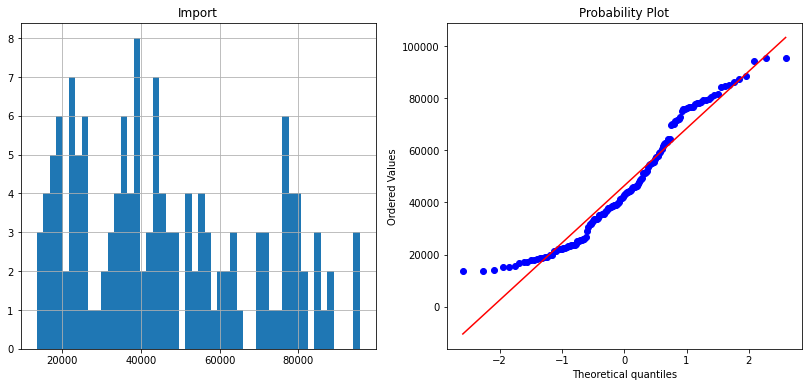

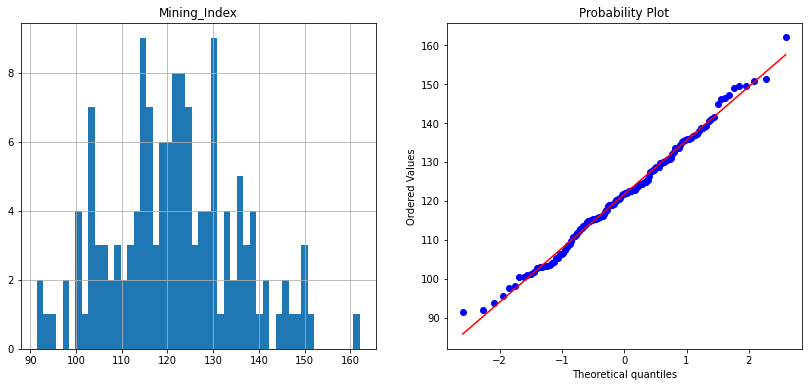

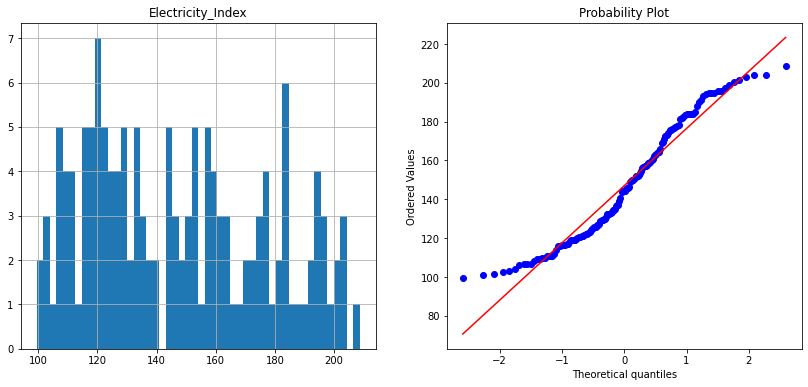

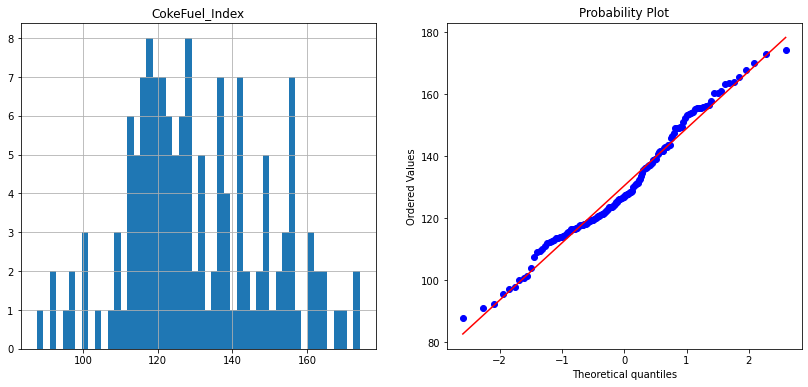

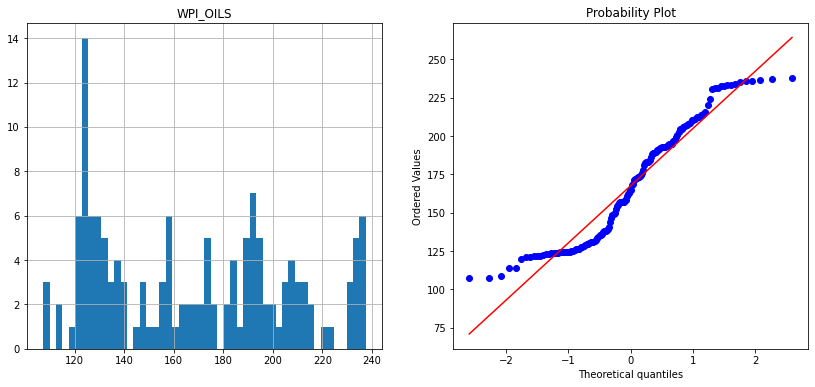

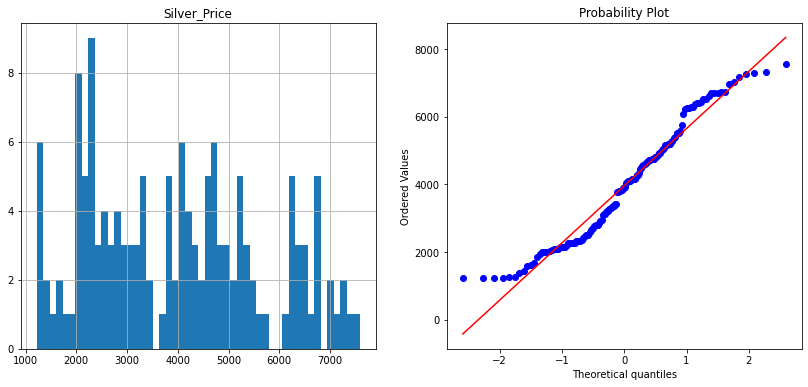

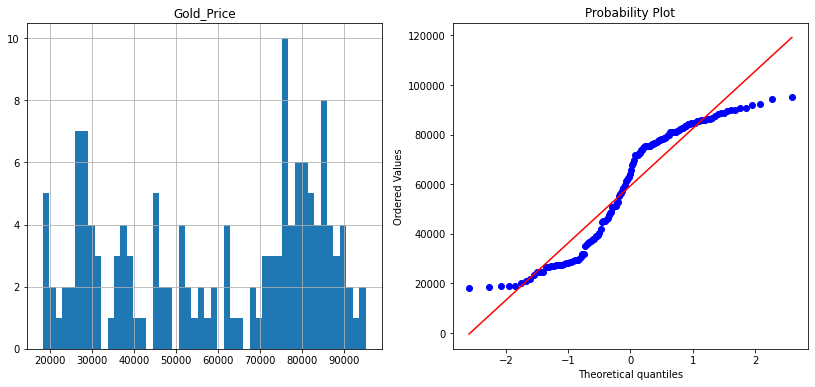

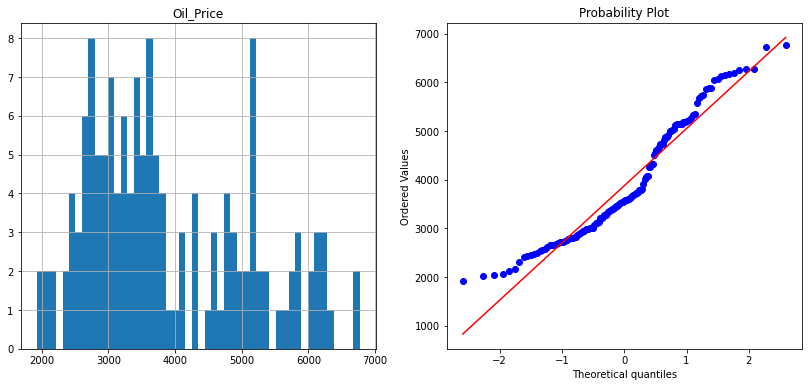

In [ ]:
for name in X_test.columns:
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    df[name].hist(bins=50)
    plt.title(name)
    plt.subplot(1,2,2)
    stats.probplot(df[name], plot=plt);
    df.Oil_Price.describe().T

In [ ]:
for name in X_test.columns:
    print(name)
    # unpacks the test statistic and p-value from the normaltest of gold
    stat, p = stats.normaltest(df[name])

    # prints both the test statistic and p-value
    print('Statistics=%.3f, p=%.3f' % (stat, p))

    # chooses an alpha of 0.05 and assigns to variable 'alpha'
    alpha = 0.05

    # creates an if statement for the hypothesis using the p-value test
    if p > alpha:
        print('Data looks Gaussian (fail to reject H0)')
    else:
        print('Data does not look Gaussian (reject H0)')

Export
Statistics=9.730, p=0.008
Data does not look Gaussian (reject H0)
Import
Statistics=21.261, p=0.000
Data does not look Gaussian (reject H0)
Mining_Index
Statistics=0.881, p=0.644
Data looks Gaussian (fail to reject H0)
Electricity_Index
Statistics=34.307, p=0.000
Data does not look Gaussian (reject H0)
CokeFuel_Index
Statistics=2.632, p=0.268
Data looks Gaussian (fail to reject H0)
WPI_OILS
Statistics=60.237, p=0.000
Data does not look Gaussian (reject H0)
Silver_Price
Statistics=21.738, p=0.000
Data does not look Gaussian (reject H0)
Gold_Price
Statistics=291.711, p=0.000
Data does not look Gaussian (reject H0)
Oil_Price
Statistics=13.502, p=0.001
Data does not look Gaussian (reject H0)


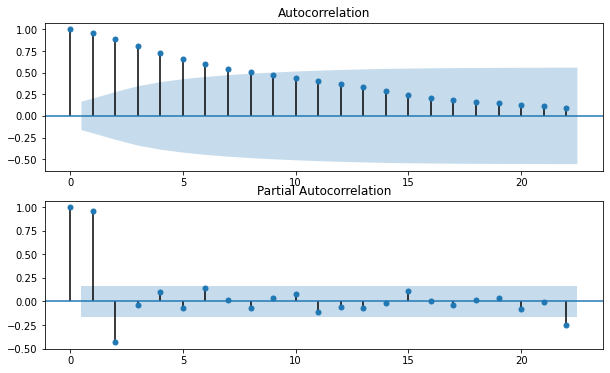

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

fig, ax = plt.subplots(2, figsize=(10,6))
ax[0] = plot_acf(df[name], ax=ax[0])
ax[1] = plot_pacf(df[name], ax=ax[1])

In [ ]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """ Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag = 'BIC')
    output = {'test_statistics':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length=6): return str(val).ljust(length)
    
    # Print Summary
    print(f'   Augmented Dickey-Fuller Test on "{name}"', "\n  ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance level   = {signif}')
    print(f' Test Statistics      = {output["test_statistics"]}')
    print(f' No. Lags Chosen      = {output["n_lags"]}')
          
    for key, val in r[4].items():
          print(f' Critical value {adjust(key)} = {round(val, 3)}')
          
    if p_value <= signif:
          print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
          print(f" => Series is Stationary.")
          
    else:
          print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
          print(f" => Series in Non-Stationary.")

In [ ]:
for name, column in df.iteritems():
          adfuller_test(column, name=column.name)
          print('\n')

   Augmented Dickey-Fuller Test on "Export" 
   -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -1.9229
 No. Lags Chosen      = 0
 Critical value 1%     = -3.477
 Critical value 5%     = -2.882
 Critical value 10%    = -2.578
 => P-Value = 0.3214. Weak evidence to reject the Null Hypothesis.
 => Series in Non-Stationary.


   Augmented Dickey-Fuller Test on "Import" 
   -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -1.8295
 No. Lags Chosen      = 2
 Critical value 1%     = -3.478
 Critical value 5%     = -2.882
 Critical value 10%    = -2.578
 => P-Value = 0.3659. Weak evidence to reject the Null Hypothesis.
 => Series in Non-Stationary.


   Augmented Dickey-Fuller Test on "Mining_Index" 
   -----------------------------------------------
 Null Hypothesis: Data has unit ro

In [ ]:
nobs = 15

# assigning the last 15 observations to the variable 'X_test', while the rest will be assigned to the variable 'X_train'
X_train, X_test = df[0:-nobs], df[-nobs:]

#check size
print(X_train.shape)
print(X_test.shape)

(129, 9)
(15, 9)


In [ ]:
transform_data = X_train.diff().dropna()
transform_data.head()

,Export,Import,Mining_Index,Electricity_Index,CokeFuel_Index,WPI_OILS,Silver_Price,Gold_Price,Oil_Price
Time_Period,,,,,,,,,
2005-05-01,-293.0,667.0,2.4,5.2,7.8,0.2,-24.51,-427.30,-150.22
2005-06-01,963.0,-683.0,-5.2,-4.1,2.3,1.4,53.21,422.98,291.50
2005-07-01,-373.0,1720.0,-2.6,-2.4,3.6,5.3,-53.66,-289.97,96.53
2005-08-01,838.0,2060.0,-4.1,4.9,-0.7,-0.2,5.97,624.35,279.60
2005-09-01,471.0,503.0,2.3,-7.1,-3.6,5.8,29.25,923.03,44.35


In [ ]:
for name, column in transform_data.iteritems():
          adfuller_test(column, name=column.name)
          print('\n')

   Augmented Dickey-Fuller Test on "Export" 
   -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -11.8449
 No. Lags Chosen      = 0
 Critical value 1%     = -3.483
 Critical value 5%     = -2.885
 Critical value 10%    = -2.579
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


   Augmented Dickey-Fuller Test on "Import" 
   -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -6.8353
 No. Lags Chosen      = 1
 Critical value 1%     = -3.483
 Critical value 5%     = -2.885
 Critical value 10%    = -2.579
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


   Augmented Dickey-Fuller Test on "Mining_Index" 
   -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance level   = 0.05


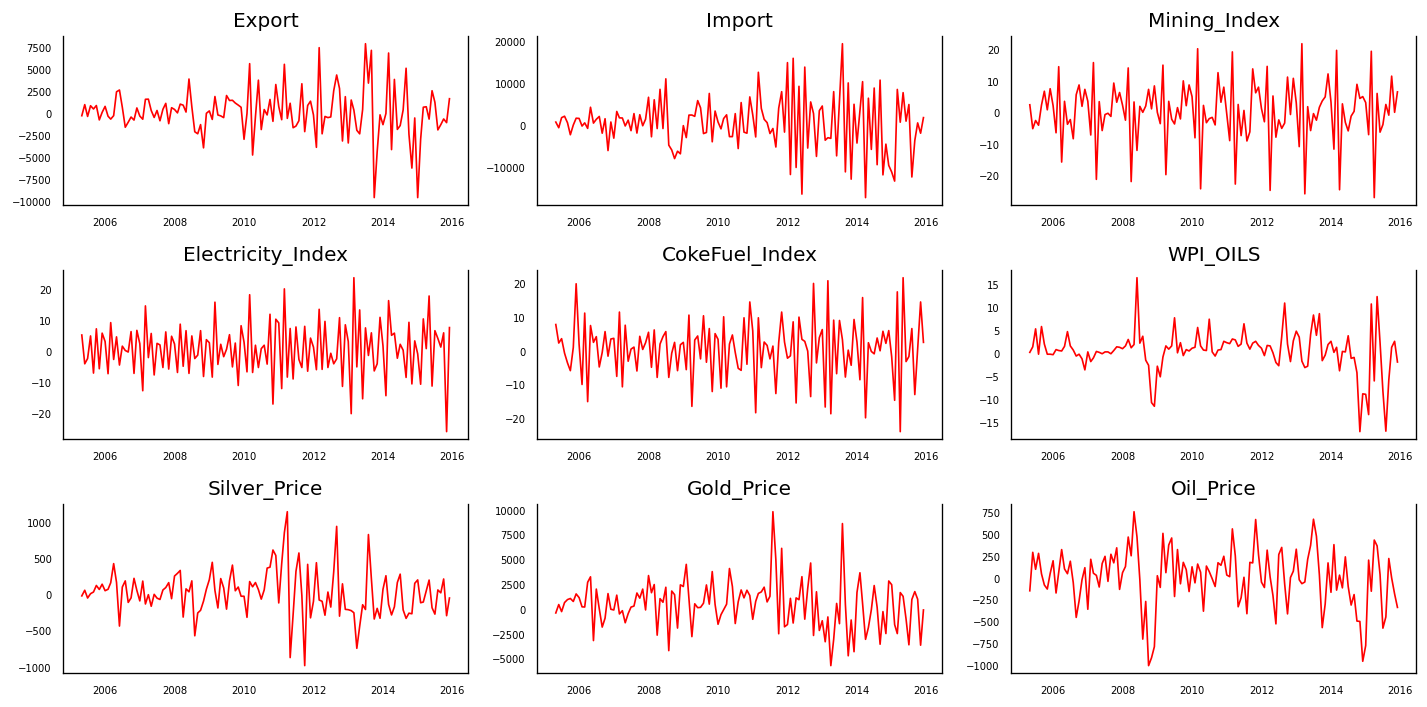

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    data = transform_data[transform_data.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(transform_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)
    
plt.tight_layout()

In [ ]:
# importing the granger causality test from statsmodels
from statsmodels.tsa.stattools import grangercausalitytests

# creating a variable named 'maxlag' and assigning the integer 5
maxlag = 5

# assigning the string 'ssr_chi2test' to the variable 'test'
test = 'ssr_chi2test'

# creating a function named 'granger_causation_matrix' with the arguments 'data', 'variables', 'test', and 'verbose'
def granger_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    
    # creating a dataframe with the same dimensions as number of variables entered, assigned to the variable 'X_train'
    X_train = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    
    # loops through the columns and the indexes
    for c in X_train.columns:
        for r in X_train.index:
            
            # conducts a granger causality test on a variable row and column using the 'maxlag' variable; assigns to 
            # variable test_result
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            
            # locates the test result in the tuple 'test_result' and rounds the number by 4 digits; assigns to 'p_values'
            p_values = [round(test_result[i+1][0][test][1], 4) for i in range(maxlag)]
            
            # if the variable is 'verbose', print the y and x variables and the associated p-value
            if verbose: 
                print(f'Y = {r}, X = {c}, P Values = {p_values}')
            
            # find the smallest p-value and assign to variable 'min_p_value'
            min_p_value = np.min(p_values)
            
            # find the smallest p-value and assign to its respective row and column
            X_train.loc[r, c] = min_p_value
            
    # remane the row and column names based on the relationship
    X_train.columns = [var + '_x' for var in variables]
    X_train.index = [var + '_y' for var in variables]
    return X_train

In [ ]:
granger_causation_matrix(X_train, variables = X_train.columns)

,Export_x,Import_x,Mining_Index_x,Electricity_Index_x,CokeFuel_Index_x,WPI_OILS_x,Silver_Price_x,Gold_Price_x,Oil_Price_x
Export_y,1.0000,0.0000,0.0013,0.0001,0.2281,0.0001,0.0004,0.0001,0.0000
Import_y,0.0001,1.0000,0.0076,0.1529,0.0750,0.0000,0.0003,0.0006,0.0000
Mining_Index_y,0.0001,0.0003,1.0000,0.0000,0.0000,0.0075,0.0052,0.0000,0.0355
Electricity_Index_y,0.0125,0.0573,0.0000,1.0000,0.0000,0.0005,0.0502,0.0008,0.1680
CokeFuel_Index_y,0.0008,0.0020,0.0281,0.0000,1.0000,0.0000,0.0149,0.0000,0.0321
WPI_OILS_y,0.0132,0.0003,0.0201,0.1353,0.0172,1.0000,0.0001,0.0060,0.0000
Silver_Price_y,0.2415,0.1505,0.0796,0.6331,0.2765,0.1505,1.0000,0.3416,0.2561
Gold_Price_y,0.2940,0.2677,0.1200,0.8016,0.2923,0.2920,0.0332,1.0000,0.2320
Oil_Price_y,0.1632,0.0815,0.1112,0.3457,0.2753,0.2061,0.0312,0.1031,1.0000


In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(transfrom_data, alpha=0.05):
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(transform_data, -1, 5) #-1 signifies it has non-determinastic term, 5- lag difference
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length=6):
        return str(val).ljust(length)
    
    # Summary
    print('Name   :: Test Stat > C(95%)       => Signif   \n', '--'*20)
    for col, trace, cvt in zip(transform_data.columns, traces, cvts):
        print(adjust(col), '::', adjust(round(trace, 2), 9), ">", adjust(cvt, 8), '  =>  ', trace >cvt)
        

cointegration_test(X_train)

Name   :: Test Stat > C(95%)       => Signif   
 ----------------------------------------
Export :: 360.23    > 179.5199   =>   True
Import :: 253.07    > 143.6691   =>   True
Mining_Index :: 174.24    > 111.7797   =>   True
Electricity_Index :: 118.99    > 83.9383    =>   True
CokeFuel_Index :: 75.22     > 60.0627    =>   True
WPI_OILS :: 46.43     > 40.1749    =>   True
Silver_Price :: 27.3      > 24.2761    =>   True
Gold_Price :: 13.19     > 12.3212    =>   True
Oil_Price :: 5.86      > 4.1296     =>   True


In [ ]:
def cointegration_test(transfrom_data, alpha=0.05):
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(transform_data, -1, 1) #-1 signifies it has non-determinastic term, 5- lag difference
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length=6):
        return str(val).ljust(length)
    
    # Summary
    print('r   :: Test Stat > C(95%)       => Signif   \n', '--'*20)
    for r, trace, cvt in zip(range(0,10), traces, cvts):
        print(r, '::', adjust(round(trace, 2), 9), ">", adjust(cvt, 8), '  =>  ', trace >cvt)
        

cointegration_test(X_train)

r   :: Test Stat > C(95%)       => Signif   
 ----------------------------------------
0 :: 683.4     > 179.5199   =>   True
1 :: 531.1     > 143.6691   =>   True
2 :: 413.3     > 111.7797   =>   True
3 :: 306.75    > 83.9383    =>   True
4 :: 223.37    > 60.0627    =>   True
5 :: 162.87    > 40.1749    =>   True
6 :: 112.17    > 24.2761    =>   True
7 :: 66.34     > 12.3212    =>   True
8 :: 30.02     > 4.1296     =>   True


In [ ]:
def adjust(val, length=6):
        return str(val).ljust(length)

jres = coint_johansen(X_train, det_order=-1, k_ar_diff=1)
Trace = jres.lr1
d = {'0.90':0, '0.95':1, '0.99':2}
p_value = jres.cvt[:, d[str(1-0.05)]]
print('r <=i::  Test Stat > C(95%)       => Signif   \n', '--'*20)
for r, trace, cvt in zip(range(0,9), Trace, p_value):
        print(r, '::', adjust(round(trace, 2), 9), ">", adjust(cvt, 8), '  =>  ', trace >cvt)



r <=i::  Test Stat > C(95%)       => Signif   
 ----------------------------------------
0 :: 190.47    > 179.5199   =>   True
1 :: 138.74    > 143.6691   =>   False
2 :: 99.73     > 111.7797   =>   False
3 :: 70.61     > 83.9383    =>   False
4 :: 42.95     > 60.0627    =>   False
5 :: 22.14     > 40.1749    =>   False
6 :: 11.48     > 24.2761    =>   False
7 :: 3.55      > 12.3212    =>   False
8 :: 0.18      > 4.1296     =>   False


In [ ]:
def adjust(val, length=6):
        return str(val).ljust(length)

jres = coint_johansen(X_train, det_order=-1, k_ar_diff=1)
Trace = jres.lr1
d = {'0.90':0, '0.95':1, '0.99':2}
p_value = jres.cvm[:, d[str(1-0.05)]]
print('r <=i::  Test Stat > C(95%)       => Signif   \n', '--'*20)
for r, trace, cvm in zip(range(0,9), Trace, p_value):
        print(r, '::', adjust(round(trace, 2), 9), ">", adjust(cvm, 8), '  =>  ', trace >cvm)



r <=i::  Test Stat > C(95%)       => Signif   
 ----------------------------------------
0 :: 190.47    > 54.9629    =>   True
1 :: 138.74    > 48.8795    =>   True
2 :: 99.73     > 42.7679    =>   True
3 :: 70.61     > 36.6301    =>   True
4 :: 42.95     > 30.4428    =>   True
5 :: 22.14     > 24.1592    =>   False
6 :: 11.48     > 17.7961    =>   False
7 :: 3.55      > 11.2246    =>   False
8 :: 0.18      > 4.1296     =>   False


In [ ]:
import statsmodels.tsa.api as smt
from statsmodels.tsa.api import VAR
mod = smt.VAR(transform_data)
res = mod.fit(maxlags= 5, ic = 'aic')
print(res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 20, Oct, 2020
Time:                     11:25:24
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    92.4289
Nobs:                     123.000    HQIC:                   86.8084
Log likelihood:          -6259.02    FPE:                1.51225e+36
AIC:                      82.9635    Det(Omega_mle):     8.66544e+34
--------------------------------------------------------------------
Results for equation Export
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                      168.261320       328.774994            0.512           0.609
L1.Export                   -0.332233         0.121131           -2.743           0.006
L1.Import                    0.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
pred = res.forecast(transform_data.values[-9:], 15)
pred_df = pd.DataFrame(pred, index=df.index[-15:], columns = df.columns)
pred_df

,Export,Import,Mining_Index,Electricity_Index,CokeFuel_Index,WPI_OILS,Silver_Price,Gold_Price,Oil_Price
Time_Period,,,,,,,,,
2016-01-01,-1563.105207,-885.300391,-8.176758,21.415509,-8.215026,-1.832362,189.539874,-493.083685,5.659730
2016-02-01,-1727.754590,-1761.049998,-8.971035,-2.823229,-7.938423,4.193176,107.574499,-2108.623639,-2.505071
2016-03-01,977.794010,-488.471917,8.234064,-5.883730,2.094478,2.675680,-141.436653,-620.751244,-198.992978
2016-04-01,1124.044388,-963.993146,-5.554514,-2.688029,6.251788,-6.144144,-170.294759,149.046399,98.230231
2016-05-01,727.873101,2878.582121,-1.357701,12.487258,8.956828,-2.075630,-78.770120,2128.402297,25.595336
2016-06-01,609.019777,-3045.959859,-6.338570,-1.521814,-10.809263,1.496285,72.102715,2199.958923,-120.403830
2016-07-01,-380.089315,-360.569051,3.739727,-7.739496,-1.737948,1.319040,242.427677,-414.620486,-36.957414
2016-08-01,-636.135853,-439.864212,6.227906,-1.955004,6.313476,-0.396291,144.569423,-287.681646,-81.362571
2016-09-01,352.233819,-861.187862,-4.007820,4.997163,-4.119978,-2.372391,-97.073742,931.288445,-35.859684


In [ ]:
# reversing the difference and assigning to variable 'pred_inverse'
pred_inverse = pred_df.cumsum() 

# inverse the difference values and assigning to variable 'f'
f = pred_inverse + X_test
print(f)

                   Export        Import  ...    Gold_Price    Oil_Price
Time_Period                              ...                           
2016-01-01   12476.894793  33105.699609  ...  73388.976315  2128.089730
2016-02-01    9902.140203  30108.649611  ...  79255.862676  2077.064659
2016-03-01   12352.934213  29187.177694  ...  80274.271432  2336.951682
2016-04-01   12426.978600  33895.184548  ...  79499.027830  2624.981913
2016-05-01   13757.851701  38898.766669  ...  83395.030127  3053.577248
2016-06-01   17651.871478  44802.806811  ...  87133.229050  3087.563418
2016-07-01   17059.782163  41227.237759  ...  90686.318564  2774.546004
2016-08-01   15787.646310  40381.373547  ...  90260.356918  2684.723433
2016-09-01   16661.880129  40196.185686  ...  90024.335363  2670.133749
2016-10-01   17766.008505  44126.279889  ...  85856.331208  3007.470771
2016-11-01   13972.391544  40795.670553  ...  84528.363515  2825.065910
2016-12-01   18010.100065  48898.896737  ...  80166.007909  3215

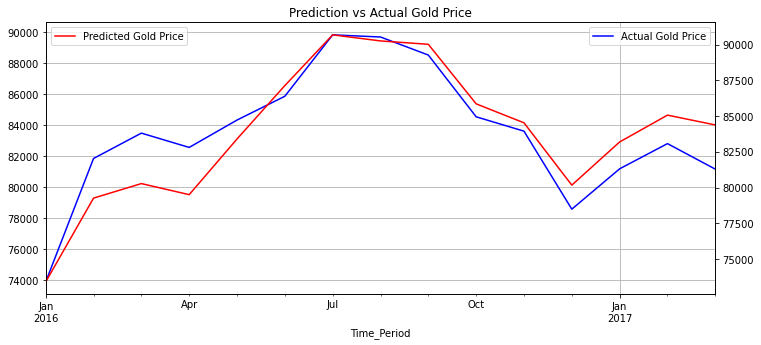

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel('Date')

ax1 = X_test.Gold_Price.plot(color='blue', grid=True, label='Actual Gold Price')
ax2 = f.Gold_Price.plot(color='red', grid=True, secondary_y=True, label='Predicted Gold Price')

ax1.legend(loc=1)
ax2.legend(loc=2)
plt.title('Prediction vs Actual Gold Price')
plt.show()

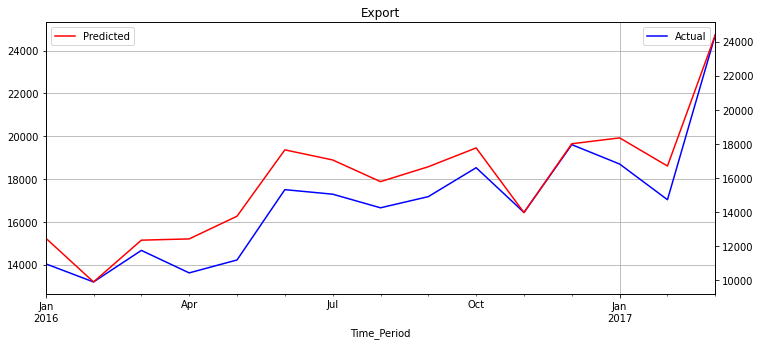

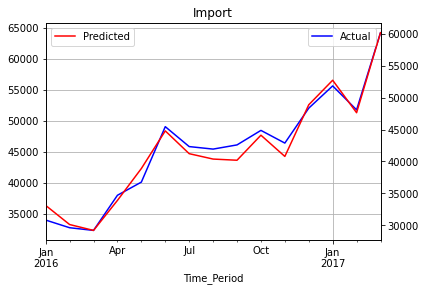

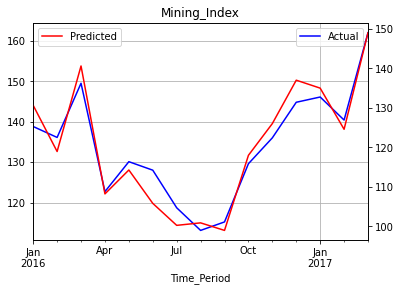

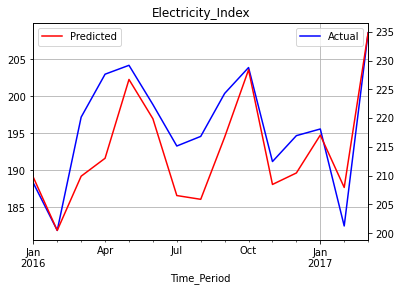

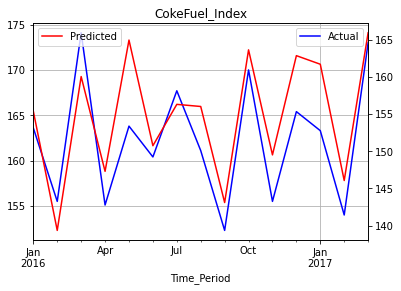

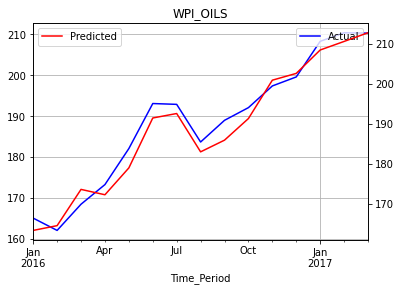

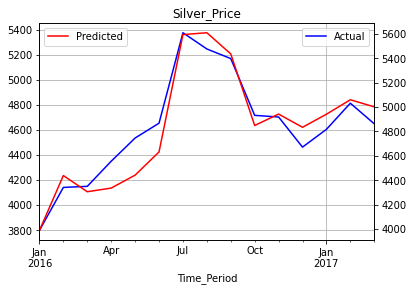

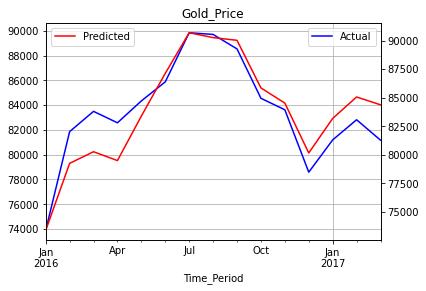

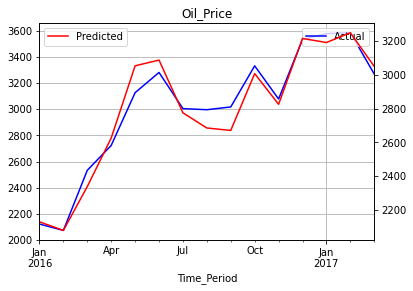

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel('Date')

for name in X_test.columns:
    label=str(name)
    ax1 = X_test[name].plot(color='blue', grid=True, label='Actual')
    ax2 = f[name].plot(color='red', grid=True, secondary_y=True, label='Predicted')

    ax1.legend(loc=1)
    ax2.legend(loc=2)
    plt.title(label)
    plt.show()

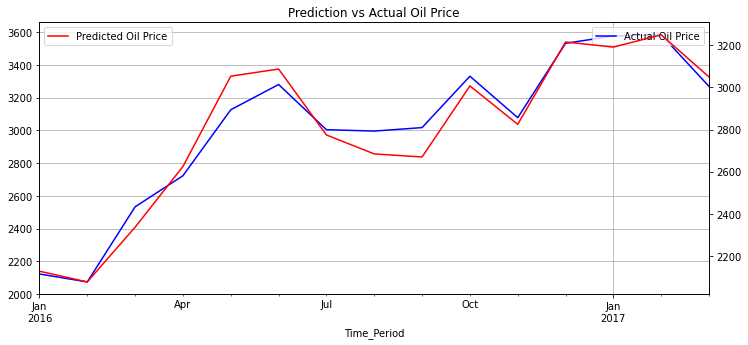

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel('Date')

ax1 = X_test.Oil_Price.plot(color='blue', grid=True, label='Actual Oil Price')
ax2 = f.Oil_Price.plot(color='red', grid=True, secondary_y=True, label='Predicted Oil Price')

ax1.legend(loc=1)
ax2.legend(loc=2)
plt.title('Prediction vs Actual Oil Price')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

forecast_errors = [X_test.Oil_Price[i]-f.Oil_Price[i] for i in range(len(X_test.Oil_Price))]
bias = sum(forecast_errors) * 1.0/len(X_test.Oil_Price)
print('Bias: %f' % bias)

mae = mean_absolute_error(X_test.Oil_Price, f.Oil_Price)
print('MAE: %f' % mae)

mse = mean_squared_error(X_test.Oil_Price, f.Oil_Price)
print('MSE: %f' % mse)

rmse = sqrt(mse)
print('RMSE: %f' % rmse)

Bias: 217.528057
MAE: 218.703309
MSE: 62251.172832
RMSE: 249.501849


In [ ]:
for name in X_test.columns:
    print(name)
    forecast_errors = [X_test[name][i]-f[name][i] for i in range(len(X_test[name]))]
    bias = sum(forecast_errors) * 1.0/len(X_test[name])
    print('Bias: %f' % bias)

    mae = mean_absolute_error(X_test[name], f[name])
    print('MAE: %f' % mae)

    mse = mean_squared_error(X_test[name], f[name])
    print('MSE: %f' % mse)

    rmse = sqrt(mse)
    print('RMSE: %f' % rmse)
    print('-'*10)

Export
Bias: 1074.767193
MAE: 1094.483390
MSE: 2060238.809761
RMSE: 1435.353200
----------
Import
Bias: 3736.975107
MAE: 3736.975107
MSE: 15897478.605457
RMSE: 3987.164231
----------
Mining_Index
Bias: 13.525790
MAE: 13.525790
MSE: 198.745967
RMSE: 14.097729
----------
Electricity_Index
Bias: -18.513783
MAE: 18.513783
MSE: 368.231165
RMSE: 19.189350
----------
CokeFuel_Index
Bias: 7.462969
MAE: 7.616255
MSE: 74.707797
RMSE: 8.643367
----------
WPI_OILS
Bias: -0.247881
MAE: 1.968678
MSE: 5.786993
RMSE: 2.405617
----------
Silver_Price
Bias: -203.608463
MAE: 220.846948
MSE: 61832.788700
RMSE: 248.661997
----------
Gold_Price
Bias: -336.340606
MAE: 1714.430155
MSE: 3793416.171471
RMSE: 1947.669420
----------
Oil_Price
Bias: 217.528057
MAE: 218.703309
MSE: 62251.172832
RMSE: 249.501849
----------
